In [171]:
from sklearn import datasets

In [173]:
iris = datasets.load_iris()
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [175]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [177]:
print(iris.data[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [192]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Species'] = [iris.target_names[i] for i in iris.target]

In [194]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [196]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [200]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

<Axes: >

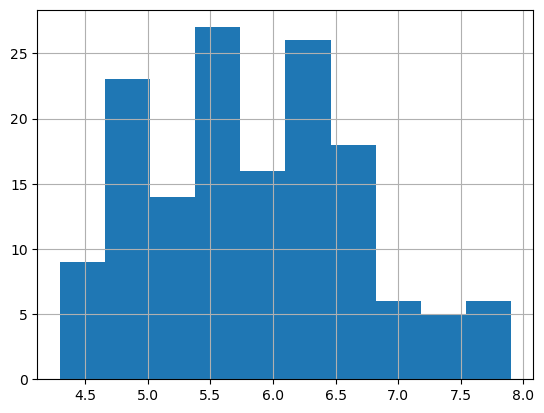

In [206]:
df['sepal length (cm)'].hist()

<Axes: >

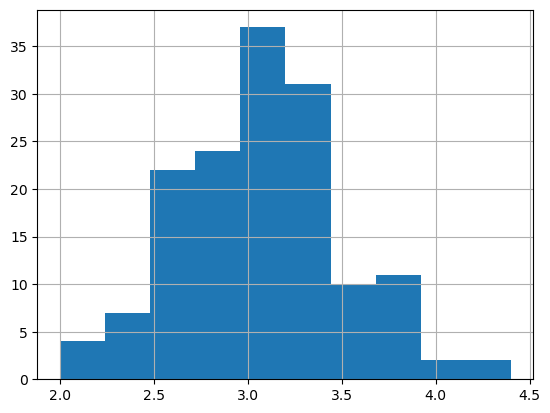

In [210]:
df['sepal width (cm)'].hist()

<Axes: >

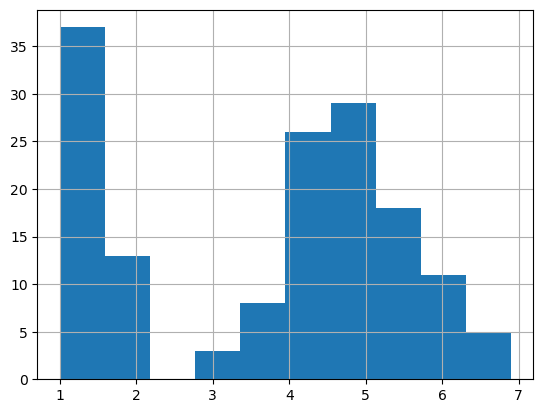

In [212]:
df['petal length (cm)'].hist()

<Axes: >

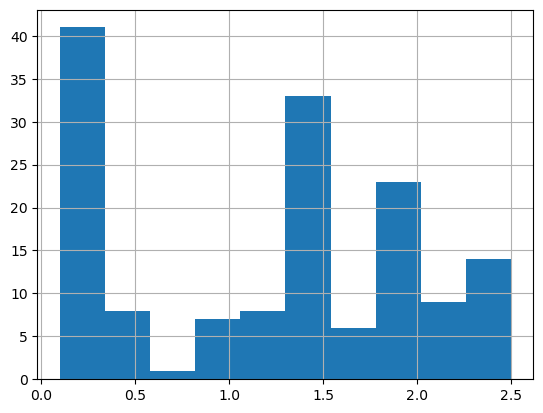

In [214]:
df['petal width (cm)'].hist()

In [216]:
df['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [218]:
colors= ['red','orange','blue']
species = ['setosa', 'versicolor', 'virginica']

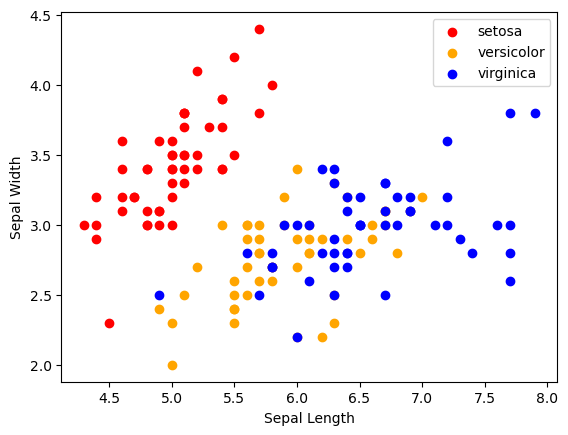

In [222]:
for i in range(3):
 x=df[df['Species']==species[i]]
 plt.scatter(x['sepal length (cm)'], x['sepal width (cm)'], c = colors[i], label=species[i])
 plt.xlabel("Sepal Length")
 plt.ylabel("Sepal Width")
 plt.legend()

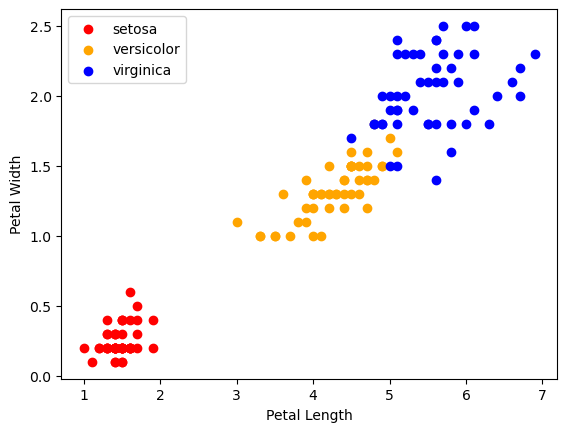

In [224]:
for i in range(3):
 x=df[df['Species']==species[i]]
 plt.scatter(x['petal length (cm)'], x['petal width (cm)'], c = colors[i], label=species[i])
 plt.xlabel("Petal Length")
 plt.ylabel("Petal Width")
 plt.legend()

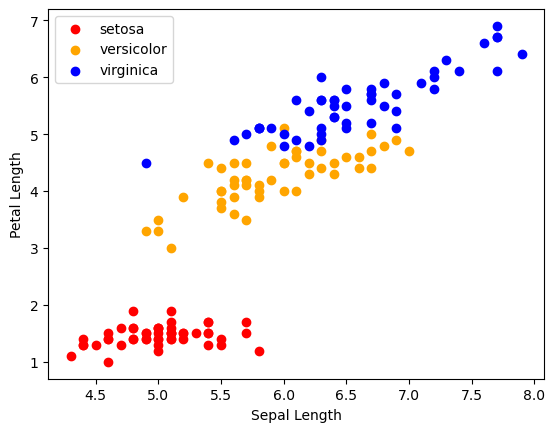

In [228]:
for i in range(3):
 x=df[df['Species']==species[i]]
 plt.scatter(x['sepal length (cm)'], x['petal length (cm)'], c = colors[i], label=species[i])
 plt.xlabel("Sepal Length")
 plt.ylabel("Petal Length")
 plt.legend()

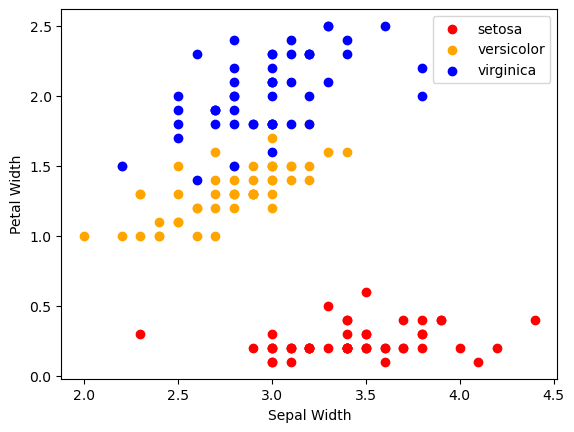

In [230]:
for i in range(3):
 x=df[df['Species']==species[i]]
 plt.scatter(x['sepal width (cm)'], x['petal width (cm)'], c = colors[i], label=species[i])
 plt.xlabel("Sepal Width")
 plt.ylabel("Petal Width")
 plt.legend()

In [234]:
df['Species'] = df['Species'].astype('category').cat.codes
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Species,0.782561,-0.426658,0.949035,0.956547,1.000000


<Axes: >

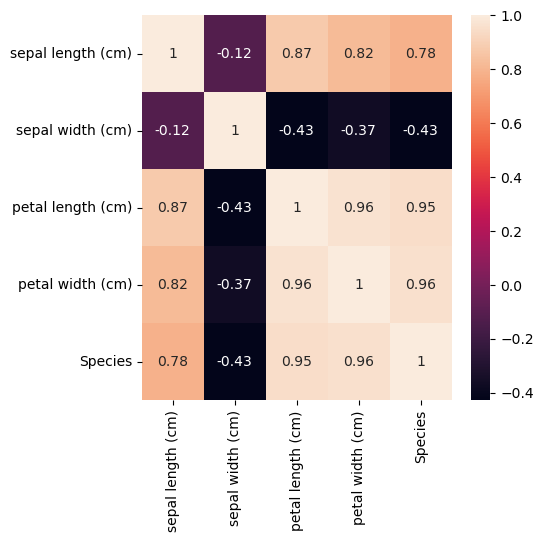

In [236]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot = True, ax = ax) 

In [238]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [240]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [244]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['Species'])
y=df['Species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [246]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [248]:
print("Accuracy: ", model.score(x_test, y_test))

Accuracy:  0.9555555555555556


In [250]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier()
model1.fit(x_train, y_train)

KNeighborsClassifier()

In [252]:
print("Accuracy: ", model1.score(x_test, y_test))

Accuracy:  0.9777777777777777


In [254]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(x_train, y_train)

DecisionTreeClassifier()

In [256]:
print("Accuracy: ", model2.score(x_test, y_test))

Accuracy:  0.9555555555555556
